In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mean values of the non-dimensional numbers for each cluster
zeta = np.array([0.034, 0.13, 0.093, 0.32, 0.25, 0.17])
eta = np.array([55., 27., 8.5, 2.0, 2.6, 5.1])
Ri = np.array([3.7, 493., 29., 506., 298., 128.])
chi = np.array([0.51, 0.3, 0.41, 0.29, 0.33, 0.33])
J = np.array([0.21, 1.43, 0.71, 3.3, 2.4, 1.6])

In [3]:
# Standard deviation of the non-dimensional numbers for each cluster
zeta_std = np.array([0.025, 0.089, 0.032, 0.078, 0.059, 0.063])
eta_std = np.array([44., 33., 6.5, 0.64, 1.3, 3.9])
Ri_std = np.array([4., 499., 27., 350., 206., 100.])
chi_std = np.array([0.13, 0.11, 0.078, 0.051, 0.064, 0.084])
J_std = np.array([0.16, 1.07, 0.20, 0.49, 0.33, 0.43])

In [4]:
# Set an array of colors to have a colormap for each cluster
n = len(chi)
colors = plt.cm.hot(np.linspace(0,1,n+3))

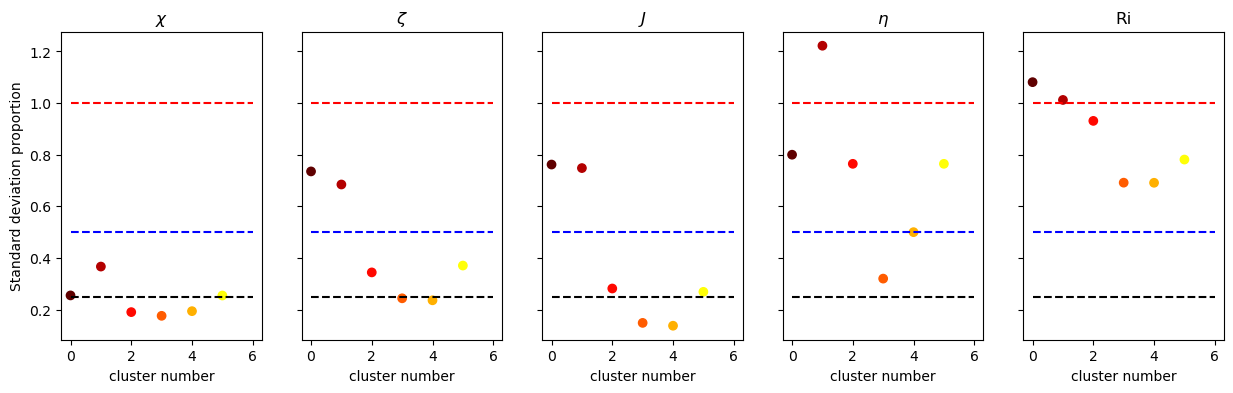

In [5]:
fig, ax = plt.subplots(1, 5, sharey=True)
ax[0].scatter(np.arange(0,6,1), chi_std/chi, c=colors[1:n+1]) 
ax[0].plot(np.linspace(0, 6), 0.25*np.ones((50,)), '--k')
ax[0].plot(np.linspace(0, 6), 0.5*np.ones((50,)), '--b')
ax[0].plot(np.linspace(0, 6), np.ones((50,)), '--r')
ax[0].set(xlabel='cluster number', title = '$\chi$',
          ylabel='Standard deviation proportion')

ax[1].scatter(np.arange(0,6,1), zeta_std/zeta, c=colors[1:n+1]) 
ax[1].plot(np.linspace(0, 6), 0.25*np.ones((50,)), '--k')
ax[1].plot(np.linspace(0, 6), 0.5*np.ones((50,)), '--b')
ax[1].plot(np.linspace(0, 6), np.ones((50,)), '--r')
ax[1].set(xlabel='cluster number', title='$\zeta$')

ax[2].scatter(np.arange(0,6,1), J_std/J, c=colors[1:n+1]) 
ax[2].plot(np.linspace(0, 6), 0.25*np.ones((50,)), '--k')
ax[2].plot(np.linspace(0, 6), 0.5*np.ones((50,)), '--b')
ax[2].plot(np.linspace(0, 6), np.ones((50,)), '--r')
ax[2].set(xlabel='cluster number', title='$J$')

ax[3].scatter(np.arange(0,6,1), eta_std/eta, c=colors[1:n+1]) 
ax[3].plot(np.linspace(0, 6), 0.25*np.ones((50,)), '--k')
ax[3].plot(np.linspace(0, 6), 0.5*np.ones((50,)), '--b')
ax[3].plot(np.linspace(0, 6), np.ones((50,)), '--r')
ax[3].set(xlabel='cluster number', title='$\eta$')

ax[4].scatter(np.arange(0,6,1), Ri_std/Ri, c=colors[1:n+1]) 
ax[4].plot(np.linspace(0, 6), 0.25*np.ones((50,)), '--k')
ax[4].plot(np.linspace(0, 6), 0.5*np.ones((50,)), '--b')
ax[4].plot(np.linspace(0, 6), np.ones((50,)), '--r')
ax[4].set(xlabel='cluster number', title='Ri')


fig.set_size_inches(15,4)

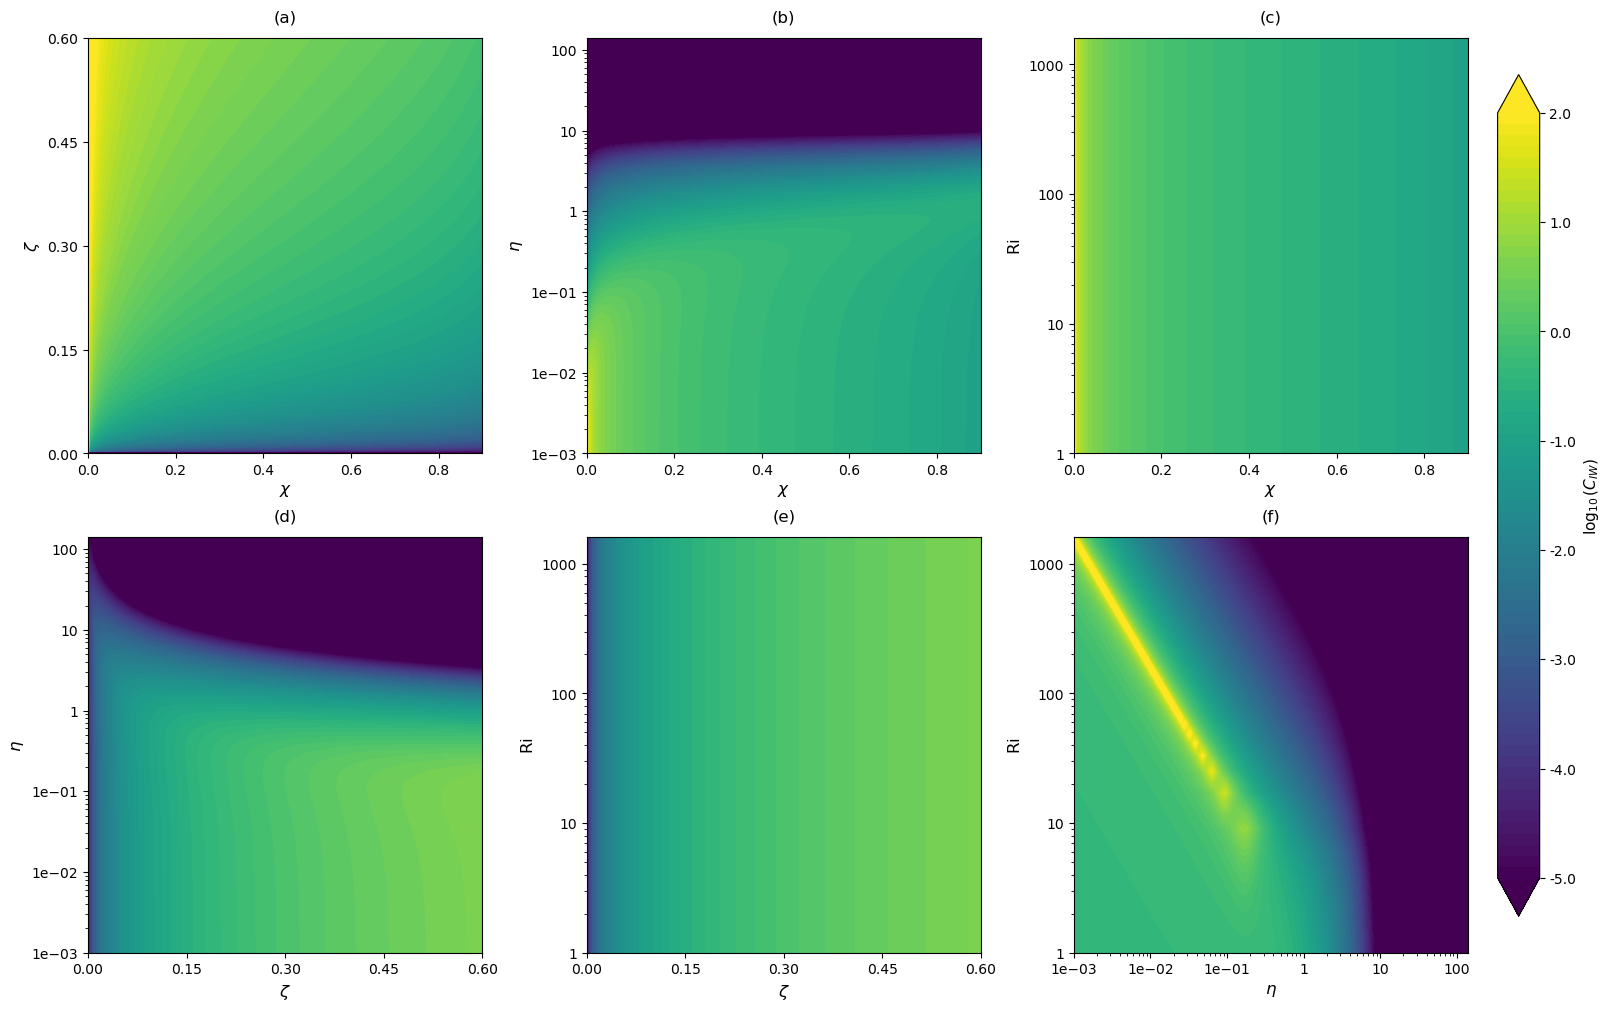

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, ScalarFormatter, LogLocator, LogFormatter, FormatStrFormatter

# ---------- Ranges (match ellipse figure) ----------
chi_vals  = np.linspace(0.0, 0.9, 200)
zeta_vals = np.linspace(0.0, 0.6, 200)
eta_vals  = np.logspace(-3, np.log10(140.0), 200)
Ri_vals   = np.linspace(1.0, 1600.0, 200)   # log axis, fixed bounds

# Fixed values when a variable is not on the axes
chi0, zeta0, eta0, Ri0 = 0.40, 0.20, 0.0, 1.0

def CDNW(chi, zeta):
    chi = np.clip(chi, 1e-6, 0.999999)
    return (np.pi**2 * zeta**2 / (2.0 * chi)) * np.sqrt(np.maximum(0.0, 1.0 - chi**2))

def Gamma(chi, zeta, eta, Ri):
    chi   = np.clip(chi, 1e-6, 0.999999)
    theta = np.pi * zeta * eta
    denom = 1.0 + (1.0/chi**2 + Ri**2)*np.sinh(theta)**2 - Ri*np.sinh(2.0*theta)
    denom = np.where(denom <= 1e-12, np.nan, denom)
    return 1.0 / denom

def CIW(chi, zeta, eta, Ri):
    return Gamma(chi, zeta, eta, Ri) * CDNW(chi, zeta)

def field_log10(xname, yname, xgrid, ygrid, eps=1e-12):
    X, Y = np.meshgrid(xgrid, ygrid, indexing='xy')
    chi  = np.full_like(X, chi0,  float)
    zeta = np.full_like(X, zeta0, float)
    eta  = np.full_like(X, eta0,  float)
    Ri   = np.full_like(X, Ri0,   float)
    for name, arr in ((xname, X), (yname, Y)):
        if name == 'chi':  chi  = arr
        if name == 'zeta': zeta = arr
        if name == 'eta':  eta  = arr
        if name == 'Ri':   Ri   = arr
    C = CIW(chi, zeta, eta, Ri)
    C = np.nan_to_num(C, nan=eps)        # avoid white holes
    Zlog = np.log10(np.maximum(C, eps))
    return X, Y, Zlog

def tidy_ticks(ax, xv, yv):
    # Linear axes: clean, few ticks
    if xv in ('chi','zeta'):
        ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.xaxis.set_major_formatter(ScalarFormatter())
    if yv in ('chi','zeta'):
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.yaxis.set_major_formatter(ScalarFormatter())
    # Log axes: powers of 10 only
    if xv in ('eta','Ri'):
        ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
        ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2,10)*0.1, numticks=12))
        ax.xaxis.set_major_formatter(LogFormatter(base=10.0, labelOnlyBase=True))
    if yv in ('eta','Ri'):
        ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))
        ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2,10)*0.1, numticks=12))
        ax.yaxis.set_major_formatter(LogFormatter(base=10.0, labelOnlyBase=True))

# (xvar, yvar, xgrid, ygrid, xlabel, ylabel, panel label)
configs = [
    ('chi',  'zeta', chi_vals,  zeta_vals, r'$\chi$',  r'$\zeta$', '(a)'),
    ('chi',  'eta',  chi_vals,  eta_vals,  r'$\chi$',  r'$\eta$',  '(b)'),
    ('chi',  'Ri',   chi_vals,  Ri_vals,   r'$\chi$',  r'$\mathrm{Ri}$',    '(c)'),
    ('zeta', 'eta',  zeta_vals, eta_vals,  r'$\zeta$', r'$\eta$',  '(d)'),
    ('zeta', 'Ri',   zeta_vals, Ri_vals,   r'$\zeta$', r'$\mathrm{Ri}$',    '(e)'),
    ('eta',  'Ri',   eta_vals,  Ri_vals,   r'$\eta$',  r'$\mathrm{Ri}$',    '(f)'),
]

fig, axes = plt.subplots(2, 3, figsize=(16, 10), constrained_layout=True)
axes = axes.ravel()

# ---- color scale (your chosen limits) ----
LOG10_CIW_VMIN = -5.0
LOG10_CIW_VMAX =  2.0
N_LEVELS = 70
levels = np.linspace(LOG10_CIW_VMIN, LOG10_CIW_VMAX, N_LEVELS)

mappable = None
for ax, (xv, yv, xr, yr, xl, yl, plabel) in zip(axes, configs):
    X, Y, Zlog = field_log10(xv, yv, xr, yr)

    im = ax.contourf(
        X, Y, Zlog,
        levels=levels,
        cmap='viridis',
        vmin=LOG10_CIW_VMIN, vmax=LOG10_CIW_VMAX,
        extend='both'   # keeps extremes colored; no white bands
    )
    mappable = im

    # Titles ABOVE the subplot to avoid overlay on dark regions
    ax.set_title(plabel, y=1.02, fontsize=12, pad=6)

    ax.set_xlabel(xl, fontsize=12)
    ax.set_ylabel(yl, fontsize=12)

    # Consistent bounds (logs for η, Ri)
    if xv == 'chi':   ax.set_xlim(0.0, 0.9)
    if yv == 'chi':   ax.set_ylim(0.0, 0.9)
    if xv == 'zeta':  ax.set_xlim(0.0, 0.6)
    if yv == 'zeta':  ax.set_ylim(0.0, 0.6)
    if xv == 'eta':
        ax.set_xscale('log'); ax.set_xlim(1e-3, 140.0)
    if yv == 'eta':
        ax.set_yscale('log'); ax.set_ylim(1e-3, 140.0)
    if xv == 'Ri':
        ax.set_xscale('log'); ax.set_xlim(1.0, 1600.0)
    if yv == 'Ri':
        ax.set_yscale('log'); ax.set_ylim(1.0, 1600.0)

    tidy_ticks(ax, xv, yv)
    ax.tick_params(labelsize=10)

# ---- shared colorbar (clean ticks/labels) ----
cbar = fig.colorbar(mappable, ax=axes, location='right', shrink=0.92, pad=0.02)
cbar.set_label(r'$\log_{10}(C_{IW})$', fontsize=11)
cbar.ax.yaxis.set_major_locator(MaxNLocator(nbins=8))
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.show()
